# Tutorial
Basic tutorial covering 1-D, 2-D and 3-D transforms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5  # data input for this demonstration

from numpy.fft import fftshift
from tqdm.auto import tqdm # for progress bars

import frft # module import

In [2]:
%matplotlib notebook

In [3]:
data = h5.File( 'data.hdf5', 'r' )
data.visit( print ) # prints entire data tree

1d
1d/amp
1d/phase
2d
2d/amp
2d/phase
3d
3d/amp
3d/phase


In [4]:
nSnapshots = 11
alpha = np.linspace( 0., 2., nSnapshots )

## 1-D FRFT

In [5]:
amp, phs = tuple( data[ '1d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_1d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_1d_shifted = fftshift( obj_1d )

In [6]:
results = []
for al in tqdm( alpha, total=alpha.size ):
    fobj_1d = frft.frft( obj_1d_shifted, al )
    results.append( fftshift( fobj_1d ) )

  0%|          | 0/11 [00:00<?, ?it/s]

[W 220210 13:39:31 frft:40] Recalculating chirp. 


<IPython.core.display.Javascript object>


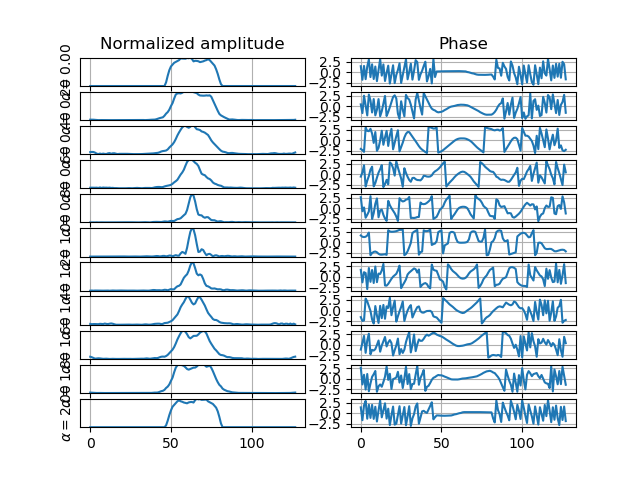

Text(0.5, 1.0, 'Phase')

In [7]:
fig, ax = plt.subplots( nSnapshots, 2, sharex=True )
for n in range( nSnapshots ):
    ax[n,0].plot( np.absolute( results[n] )/np.absolute( results[n].max() ) )
    ax[n,0].grid() 
    ax[n,0].set_ylim( [ 0., 1. ] )
    ax[n,0].set_yticks( [] )
    ax[n,0].set_ylabel( r'$\alpha = %.2f$'%alpha[n] )
    
    ax[n,1].plot( np.angle( results[n] ) )
    ax[n,1].grid()

ax[0,0].set_title( 'Normalized amplitude' )
ax[0,1].set_title( 'Phase')

## 2-D FRFT

In [8]:
amp, phs = tuple( data[ '2d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_2d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_2d_shifted = fftshift( obj_2d )

In [9]:
results = []
for al in tqdm( alpha ):
    fobj_2d = frft.frft( obj_2d_shifted, al )
    results.append( fftshift( fobj_2d ) )

  0%|          | 0/11 [00:00<?, ?it/s]

[W 220210 13:39:32 frft:40] Recalculating chirp. 


<IPython.core.display.Javascript object>


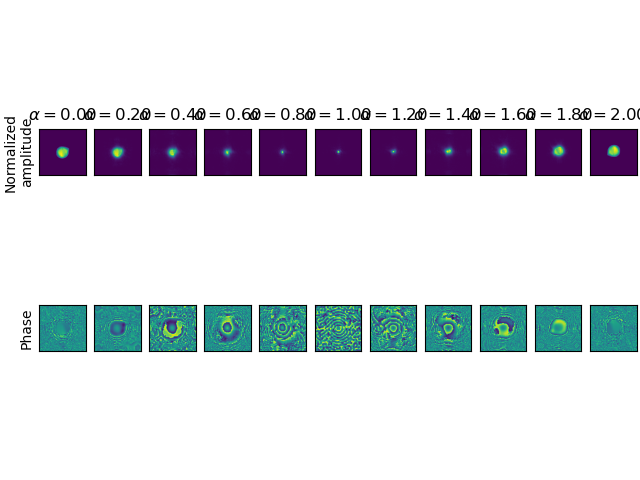

In [10]:
fig, ax = plt.subplots( 2, nSnapshots )
for n in range( nSnapshots ):
    ax[0,n].imshow( np.absolute( results[n] )/np.absolute( results[n].max() ) )
    ax[0,n].set_xticks( [] )
    ax[0,n].set_yticks( [] )
    ax[0,n].set_title( r'$\alpha = %.2f$'%alpha[n] )
    
    ax[1,n].imshow( np.angle( results[n] ) )
    ax[1,n].set_xticks( [] )
    ax[1,n].set_yticks( [] )


ax[0,0].set_ylabel( 'Normalized\namplitude' )
ax[1,0].set_ylabel( 'Phase')

fig.tight_layout( pad=0.25, h_pad=0.25 )

## 3D FRFT

In [11]:
amp, phs = tuple( data[ '3d/%s'%st ][:] for st in [ 'amp', 'phase' ] )
obj_3d = amp * np.exp( 1.j * phs ) # complex-valued object
obj_3d_shifted = fftshift( obj_3d )

In [12]:
results = []
for al in tqdm( alpha ):
    fobj_3d = frft.frft( obj_3d_shifted, al )
    results.append( fftshift( fobj_3d ) )

  0%|          | 0/11 [00:00<?, ?it/s]

[W 220210 13:39:33 frft:40] Recalculating chirp. 


In [13]:
data.close()

## Conclusions
Note the time taken for the calculation of 1-D, 2-D and 3-D FRFTs (sizes $128$, $128^2$ and $128^3$ pixels respectively). 

| Data type | Size( pixels) | Time taken for FRFT (ms) |
|:----------:|:-----------:|:--------:|
| 1D | $128$ | 0.0689 | 
| 2D | $128^2$ | 2.60 |
| 3D | $128^3$ | 819.67 |